In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['spam.csv']


**Read and remove redundant columns**

In [2]:
data = pd.read_csv('../input/spam.csv', encoding='latin-1')
data.columns = ["label", "text", "A1", "A2", "A3"]
data.head()

,label,text,A1,A2,A3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data = data.drop(columns=["A1", "A2", "A3"])
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


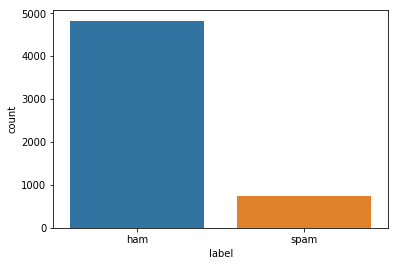

In [4]:
sns.countplot(data["label"])

Most common nonspam text is "Sorry, I'll call later". 
Thus Data seems Legit :p 

In [5]:
data.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

**Visualization using wordcloud**

In [6]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

spamtextdf = data[data.label == "spam"].text
hamtextdf = data[data.label == "ham"].text

spamtext = " ".join(text for text in spamtextdf)
hamtext = " ".join(text for text in hamtextdf)
stopwords = stopwords.words('english')

wordcloudspam = WordCloud(stopwords=stopwords, background_color="white").generate(spamtext)
wordcloudham = WordCloud(stopwords=stopwords, background_color="white").generate(hamtext)

spam text wordcloud

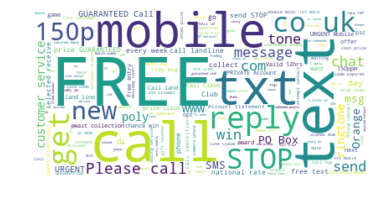

In [7]:
plt.imshow(wordcloudspam, interpolation='bilinear')
plt.axis("off")
plt.show()

non spam text wordcloud

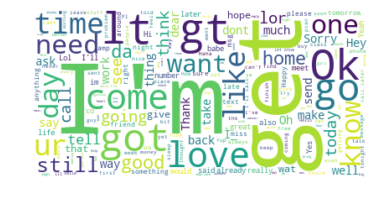

In [8]:
plt.imshow(wordcloudham, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's split data into training and testing data 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X_train,X_test,y_train,y_test = train_test_split(data["text"],data["label"], test_size = 0.2, random_state = 42)


**Extracting features from text data**

We need to convert text data into numeric vectors for fitting ml models.we will use bag of words approach in which each sentence is just bag of distinct words.
We will use TfidfVectorizer which is Tfidf transformation applied to countvectorizer. countvectorizer essentially converts sentence into vector of length of length of vocabulory with count of how many time does word oocur in sentence being that value and rest being zero.
TFidf(Term Frequency-Inverse Document Frequency) in simple word transforms prvious vector into vector with weightage values of importance of particular word in sentence.

more about this can be seen at: [https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/](http://)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

fit vect with training vocabulory and transform train/test data

In [11]:
vect.fit(X_train)
feature_train = vect.transform(X_train)
feature_test = vect.transform(X_test)
print(feature_train.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.24340433 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


**Machine Learning Models**

we will try to predict whether messege is spam using following 4 classifiers:

* Logistic Regression
* SVM
* Naive bayes
* Random Forest

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
prediction = dict()

Logistic Regression

In [13]:
model = LogisticRegression()
model.fit(feature_train,y_train)
prediction["Logistics"]= model.predict(feature_test)
accuracy_score(y_test,prediction["Logistics"])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.967713004484305

SVM

In [14]:
model = SVC(gamma=1)
model.fit(feature_train,y_train)
prediction["svc"]= model.predict(feature_test)
accuracy_score(y_test,prediction["svc"])

0.9820627802690582

Multinomial Naive Bayes

In [15]:
model = MultinomialNB(alpha=0.01)
model.fit(feature_train,y_train)
prediction["mnb"]= model.predict(feature_test)
accuracy_score(y_test,prediction["mnb"])

0.9838565022421525

Random Forest

In [16]:
model = RandomForestClassifier(n_estimators=15, random_state=42)
model.fit(feature_train,y_train)
prediction["rf"]= model.predict(feature_test)
accuracy_score(y_test,prediction["rf"])

0.9748878923766816

Comparison of various classifiers

In [17]:
accuracy = {"LogisticRegression":0.967713004484305, "SVM":0.9820627802690582, "naiveBays":0.9838565022421525, "randomForest":0.9748878923766816}

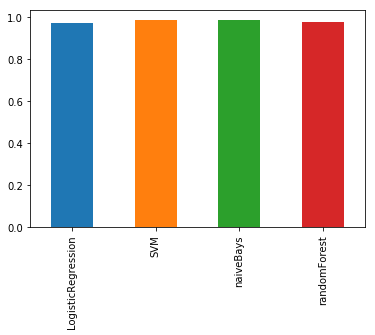

In [18]:
accuracy_df = pd.Series(accuracy)
accuracy_df.plot(kind='bar')